# Exploring Dandiset 001375: Septum GABA Disruption with DREADDs

This notebook was AI-generated and has not been fully verified. Please exercise caution when interpreting the code or results.

## Overview
This pilot study explores the effect of disrupting septal gabaergic activity using DREADDs on hippocampal and neocortical activity. The data is available on the [DANDI Archive](https://dandiarchive.org/dandiset/001375).

## Contents
This notebook covers:
- Loading Dandiset data using the DANDI API
- Examining NWB file metadata
- Visualizing multi-channel time series data

## Required Packages
Ensure the following packages are installed in your Python environment:
- pynwb
- h5py
- remfile
- numpy
- matplotlib

In [1]:
# Loading the Dandiset using DANDI API
from dandi.dandiapi import DandiAPIClient

# Connect to DANDI archive
client = DandiAPIClient()
dandiset = client.get_dandiset("001375")

# Print basic information about the Dandiset
metadata = dandiset.get_raw_metadata()
print(f"Dandiset name: {metadata['name']}")
print(f"Dandiset URL: {metadata['url']}")

# List the assets in the Dandiset
assets = list(dandiset.get_assets())
print(f"\nFound {len(assets)} assets in the dataset")
print("\nFirst 5 assets:")
for asset in assets[:5]:
    print(f"- {asset.path}")

Dandiset name: Septum GABA disruption with DREADDs
Dandiset URL: https://dandiarchive.org/dandiset/001375/0.250406.1855

Found 3 assets in the dataset

First 5 assets:
- sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb
- sub-MS14A/sub-MS14A_ses-20240906T190000_obj-12781w8_ecephys.nwb
- sub-MS14A/sub-MS14A_ses-20240906T190000_obj-ardad2_ecephys.nwb


## Loading and Exploring NWB File
We will load the NWB file located at `sub-MS13B/sub-MS13B_ses-20240725T190000_ecephys.nwb`.

Asset URL: `https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/`.

In [2]:
import pynwb
import h5py
import remfile
import numpy as np
import matplotlib.pyplot as plt

# Load the NWB file
url = "https://api.dandiarchive.org/api/assets/ce525828-8534-4b56-9e47-d2a34d1aa897/download/"
remote_file = remfile.File(url)
h5_file = h5py.File(remote_file, 'r')
io = pynwb.NWBHDF5IO(file=h5_file, load_namespaces=True)
nwb = io.read()

# Show some basic metadata from the NWB file
print(f"Session Description: {nwb.session_description}")
print(f"Session Start Time: {nwb.session_start_time}")
print(f"Subject ID: {nwb.subject.subject_id}")
print(f"Age of Subject: {nwb.subject.age}")

/opt/conda/lib/python3.11/site-packages/hdmf/spec/namespace.py:535: UserWarning: Ignoring cached namespace 'core' version 2.8.0 because version 2.7.0 is already loaded.
  warn("Ignoring cached namespace '%s' version %s because version %s is already loaded."


Session Description: mouse running laps in virtual hallway
Session Start Time: 2024-07-25 19:00:00-07:00
Subject ID: MS13B
Age of Subject: P90D


## Visualizing Multi-channel Time Series Data
Here we visualize a subset of the acquisition data from the first 10 channels over the initial 200 milliseconds.

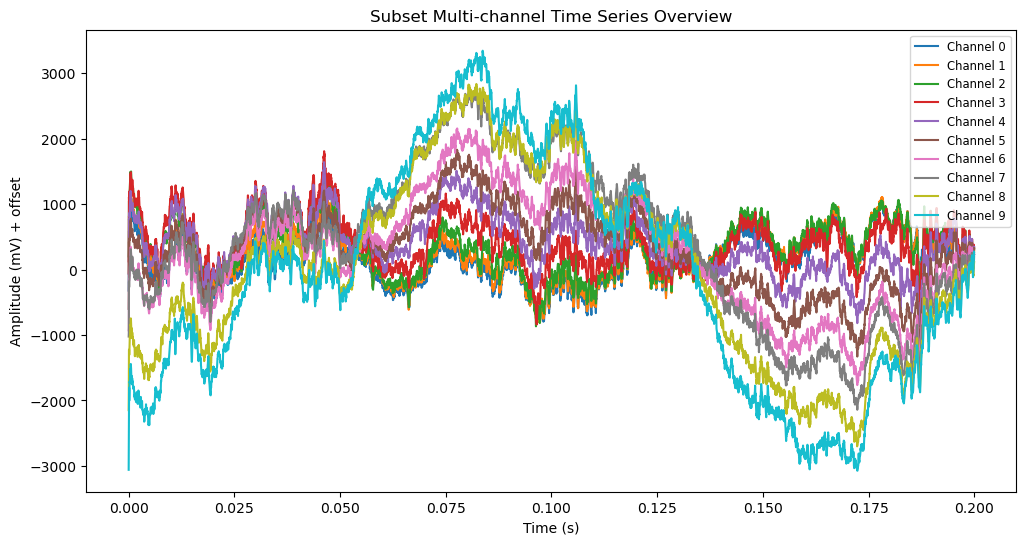

In [3]:
subset_data = nwb.acquisition["time_series"].data[0:6000, 0:10]  # First 200 ms with 10 channels
times = np.arange(subset_data.shape[0]) / nwb.acquisition["time_series"].rate

# Plot the first few channels
plt.figure(figsize=(12, 6))
for i in range(subset_data.shape[1]):  # Plotting the first 10 channels
    plt.plot(times, subset_data[:, i] + i * 10, label=f"Channel {i}")  # Shift each channel for readability

plt.title("Subset Multi-channel Time Series Overview")
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (mV) + offset")
plt.legend(loc="upper right", fontsize="small")
plt.show()

# Closing the file connections
io.close()
h5_file.close()

## Summary
This notebook has demonstrated loading and visualizing data from an NWB file in Dandiset 001375. Future analysis could investigate specific event patterns, correlations, or electrode configurations within the data.